## Máster en Data Science

### Machine Learning

Contacto: angel.blanco@cunef.edu

# **Métricas del modelo final**

En este notebook se analizan y grafican las métricas del modelo final.

### Librerías

In [11]:
import os
from pathlib import Path

# Cambio del directory al root del proyecto
current_dir = Path.cwd()

if current_dir.name == "notebooks":
    os.chdir(current_dir.parent)

# Procesamiento
import pandas as pd

# Evaluación del modelo
from scikitplot.metrics import (
    plot_confusion_matrix, 
    plot_precision_recall, 
    plot_roc, 
    plot_cumulative_gain, 
    plot_lift_curve
)

# Funciones
from src.data import read_test, read_train
from src.models import read_model

# Gráficos
import matplotlib.pyplot as plt

# Omitir warnings
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [2]:
# Carga de train y test
x_train, y_train = read_train()
x_test, y_test = read_test()

In [3]:
# Modelo en pickle
model = read_model(name="LogisticRegression")

### Predicciones del modelo

In [15]:
# Predicciones
pred_proba_test = model.predict_proba(x_test)
y_pred = model.predict(x_test)

### Matriz de confusión

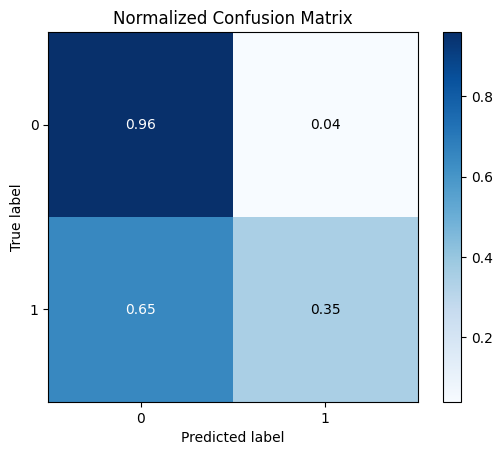

In [5]:
plot_confusion_matrix(y_true=y_test, y_pred=y_pred, normalize=True)

# Así quito el grid gris que aparece por defecto
plt.grid(False)

plt.show()

La matriz de confusión muestra las predicciones del modelo en comparación con los valores reales.

En el eje Y se encuentran los valores verdaderos y en el X los predichos.

Los valores en la diagonal principal (0.96 y 0.35) representan las tasas de clasificación correcta para cada clase. Mientras que, los otros valores (0.04 y 0.65), representan las tasas de error.

Gracias a la matriz de confusión observamos que el modelo tiene una alta tasa de verdaderos negativos (0.96) para la clase 0 y una tasa de verdaderos positivos del 35% (0.35) para la clase 1. Sin embargo, también muestra una alta tasa de falsos negativos (0.65) para la clase 0 y una baja tasa de falsos positivos (0.04) para la clase 1.

En otras palabras, el modelo no es muy bueno. Podría ser que los datos tengan mucho ruido, que haya cometido algún error en el proceso, que el problema del fraude sea muy complejo o que el set de test presente una distribución muy diferente a la del set de entrenamiento.

Veamos el resto de métricas.

### Curva ROC 

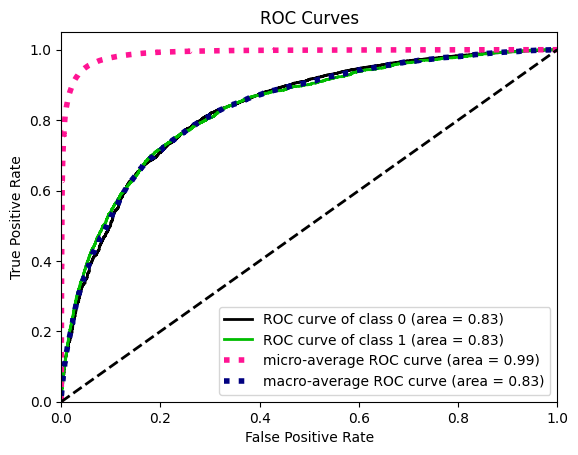

In [6]:
# Graficamos las curvas ROC sobre el test
plot_roc(y_true=y_test, y_probas=pred_proba_test)

plt.show()

La curva ROC **no es buena para problemas desbalanceados** como este, pero se muestra en el trabajo igual por tratarse de un proyecto académico.

Las líneas continuas verde y negra, representan la capacidad de discriminación del modelo. Muestran cómo se comporta el modelo a diferentes umbrales de clasificación.

Por otro lado, la línea discontinua negra representa un clasificador aleatorio, es decir, un clasificador que no tiene ninguna habilidad de discriminación y clasifica los ejemplos al azar.

En el eje X vemos la tasa de falsos positivos y en el eje Y la tasa de verdaderos positivos, ambas varían del 0 al 1.

Se observa que el modelo tiene un buen rendimiento, ya que su curva está muy por encima de la línea del clasificador aleatorio, acercándose al borde superior izquierdo del gráfico. Esto indica que el modelo tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos para varios umbrales de clasificación.

### Precisión y Recall

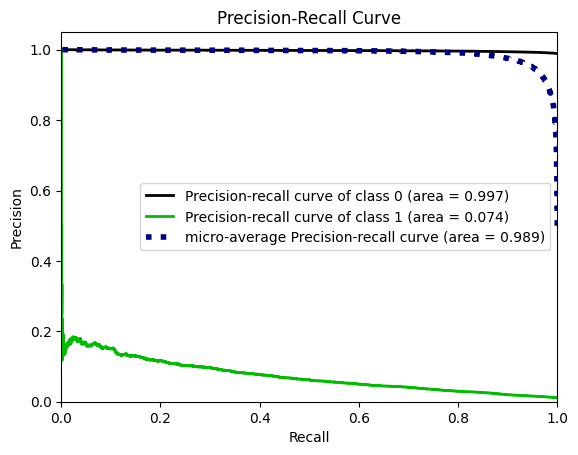

In [7]:
plot_precision_recall(y_true=y_test, y_probas=pred_proba_test)

plt.show()

Esta métrica **sí es buena para datasets desbalanceados**.

Este gráfico muestra cómo se comporta la precisión del modelo a medida que se ajusta el umbral de clasificación para aumentar el recall. Un AUC más alto indica un mejor rendimiento del modelo.

La línea verde representa la relación entre la precisión y el recall para el modelo. Esta línea muestra que la precisión es alta cuando el recall es bajo, pero disminuye a medida que el recall aumenta (hay un trade-off). Por otra parte, la línea negra continua representa de nuevo un clasificador aleatorio que clasifica los ejemplos al azar. Esta línea muestra una precisión constante independientemente del nivel de recall.

Se ve cómo se comporta la precisión del modelo a medida que se ajusta el umbral de clasificación para aumentar el recall. 

### Curva de ganancia

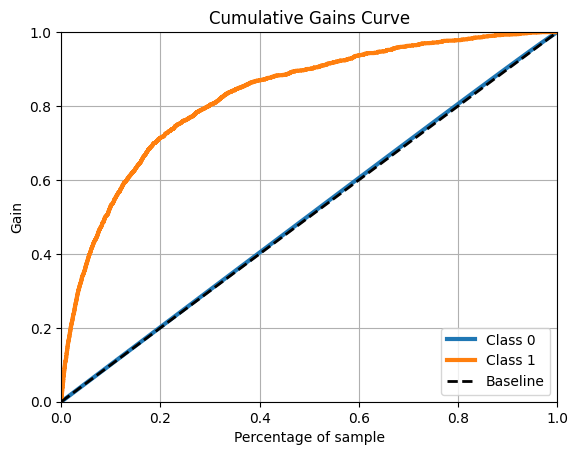

In [8]:
plot_cumulative_gain(y_true=y_test, y_probas=pred_proba_test)

plt.show()

Con la curva de ganancia podemos ver cuanto ha acertado de 1 y 0 para ciertos cortes que hace de la muestra. Denota si las probabilidades más altas las está acertando bien. A medida que baja la probabilidad es normal que baje el acierto.

Nos muestra la efectividad de una estrategia de clasificación en comparación con una selección aleatoria. Aquí te dejo una descripción detallada:

La línea de los casos de fraude presenta un aumento rápido inicial en ganancia antes de aplanarse alrededor del 60% del porcentaje de muestra.
La línea de los casos normales, que está casi alineada con la línea de selección aleatoria, indica un rendimiento cercano al azar.

En resumen, esta curva de ganancia muestra que el modelo tiene un buen rendimiento para la clase 1 hasta aproximadamente el 60% de la muestra, después, la ganancia se aplana. Esto podría indicar que se están clasificando correctamente la mayoría de las instancias positivas en las primeras etapas, pero tiene dificultades para identificar las instancias positivas restantes en las etapas posteriores.

### La curva Lift

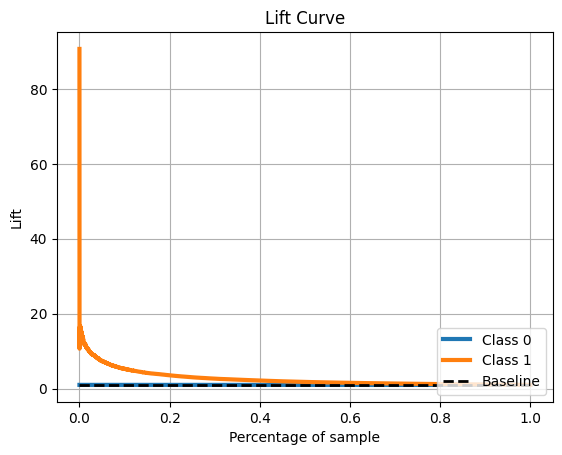

In [9]:
plot_lift_curve(y_true=y_test, y_probas=pred_proba_test)

plt.show()

Es lo mismo que la curva de ganancia pero frente a un modelo aleatorio.

Se observa de nuevo un buen rendimiento inicial, ya que la curva se dispara rápidamente antes de estabilizarse. Esto indica que es capaz de identificar correctamente una gran proporción de los casos positivos en las primeras etapas del conjunto de datos. Parece ser un modelo efectivo para identificar la clase 1, pero no tanto para la clase 0.

### Posibles cambios a realizar para mejorar los resultados:

- Optimizar el umbral de clasificación: ajustar el umbral de clasificación puede ayudar a mejorar la precisión o el recall.

- Recopilar más datos: si fuese posible, recopilar más datos o hacer data augmentation podría ayudar a mejorar el rendimiento del modelo.

- Probar diferentes modelos y/o técnicas de ingeniería de variables: cada tipo de modelo tiene sus fortalezas y sus debilidades, puede que otro tipo funcione mejor. O puede que haciendo cambios diferentes en las variables en la etapa de feature engineering consiguiésemos mejores resultados.